<code>years_em</code> fueron completados con ceros

<code>years_demency</code> fueron completados con ceros

<code>tecar</code> reasignado con binario

<code>lateralidad</code> reasignado con binario: 1:diestro

<code>genero</code> reasignado con binario: 1:M 0:H

<code>tipico</code>, <code>tipico</code> y <code>deposito</code> han sido completadas con ceros en las casillas vacías (Entre los existentes ninguno tiene valor cero)

Paciente 10: variable <code>posee_dii</code> vacío. Se ha puesto 'NO'

Paciente 25: variables <code>forst_iden</code>,	<code>fcsrt_free_recall_score</code>,	<code>fcsrt_cued_recall_score</code> y	<code>fcsrt_total_recall_score</code> vacías. Se ha puesto 0


Variables han sido reescritas en minúscula y separadas con _

<code>NaN</code> elements have been replaced with 1 in <code>p_value</code>


In [94]:
# Imports needed for the script
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [95]:
data_non = pd.read_csv("r2_structure_function_greater_07_with_structures.csv", sep = ';') 

names = data_non.columns
#data_non.columns = [''] * len(data_non.columns)
data_non.shape

(466, 14)

In [96]:
data_non = data_non.fillna(1)

In [97]:
#data_non.index = data_non.index.droplevel(0)
#data_non = data_non.reset_index()
#data_non.set_index(data_non.columns[0]).reset_index()
data_non.head(70)

,structure,substructure,r2_adjusted,edad_p,coef,escolaridad_p,coef.1,years_em_p,coef.2,function_test,function_test_p,coef.3,side,group
0,amygdala,lhaccessorybasalnucleus,0.750,0.894,0.1789,0.017,8.0775,0.362,0.8842,hvlt_delayed_recall,0.030,-5.1475,right,SND
1,amygdala,lhanterioramygdaloidarea,0.872,0.965,-0.0091,0.003,1.9117,0.933,-0.0121,hvlt_delayed_recall,0.002,-1.5364,right,SND
2,amygdala,lhanterioramygdaloidarea,0.716,0.078,0.5742,0.007,2.0521,0.305,-0.2045,animal_fluency,0.151,-1.2063,left,SND
3,amygdala,lhanterioramygdaloidarea,0.772,0.053,0.5832,0.004,2.1415,0.244,-0.2118,hvlt_delayed_recall,0.080,-0.6835,left,SND
4,amygdala,lhbasalnucleus,0.745,0.300,2.6325,0.013,15.3899,0.788,0.4461,animal_fluency,0.052,-15.9294,right,SND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,gray_matter_segmentation,parsopercularis_graymatter,0.727,0.007,-31.5308,0.047,-17.7005,0.022,14.6213,rey_figure_immediate_recall,0.447,6.8658,right,SD
66,gray_matter_segmentation,parsopercularis_graymatter,0.700,0.007,-32.4853,0.054,-17.8717,0.027,13.0814,rey_figure_delayed_recalled,0.706,2.4895,right,SD
67,gray_matter_segmentation,parsopercularis_graymatter,0.817,0.001,-38.9806,0.012,-24.9860,0.007,15.5516,boston_naming_test,0.122,5.3746,right,SD
68,gray_matter_segmentation,parsopercularis_graymatter,0.745,0.003,-35.2720,0.029,-20.4091,0.025,12.4906,ace,0.348,-1.3895,right,SD


In [99]:
general_structures = data_non['structure'].drop_duplicates()
general_structures.values
data_non.shape
general_structures = general_structures.values
general_structures

demographic_functional_tests = np.array(['age','schooling','years_emi','years_demency','posee_hta',
                                'posee_dii','tipico','atipico','deposito','meses_con_antipsicotico',
                                'tecar','depression','hachinski_ischemia_score','cdr','ace','mmse',
                                'letter_f','animal_fluency','letter_s','hvlt_palabras_de_rey_total_recall',
                                'hvlt_delayed_recall','rey_figure_copy','rey_figure_immediate_recall',
                                'rey_figure_delayed_recalled','digit_span','boston_naming_test','tmt_a',
                                'tmt_b','forst_iden','fcsrt_free_recall_score','fcsrt_cued_recall_score',
                                'fcsrt_total_recall_score'])
len_demographic_functional_tests = len(demographic_functional_tests)

In [100]:
print(general_structures)

['amygdala' 'basal_ganglia' 'cingulate' 'general_segmentation'
 'gray_matter_segmentation' 'hippocampus' 'segmentation' 'thalamicnuclei'
 'ventricles' 'whitematter_segmentation']


/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


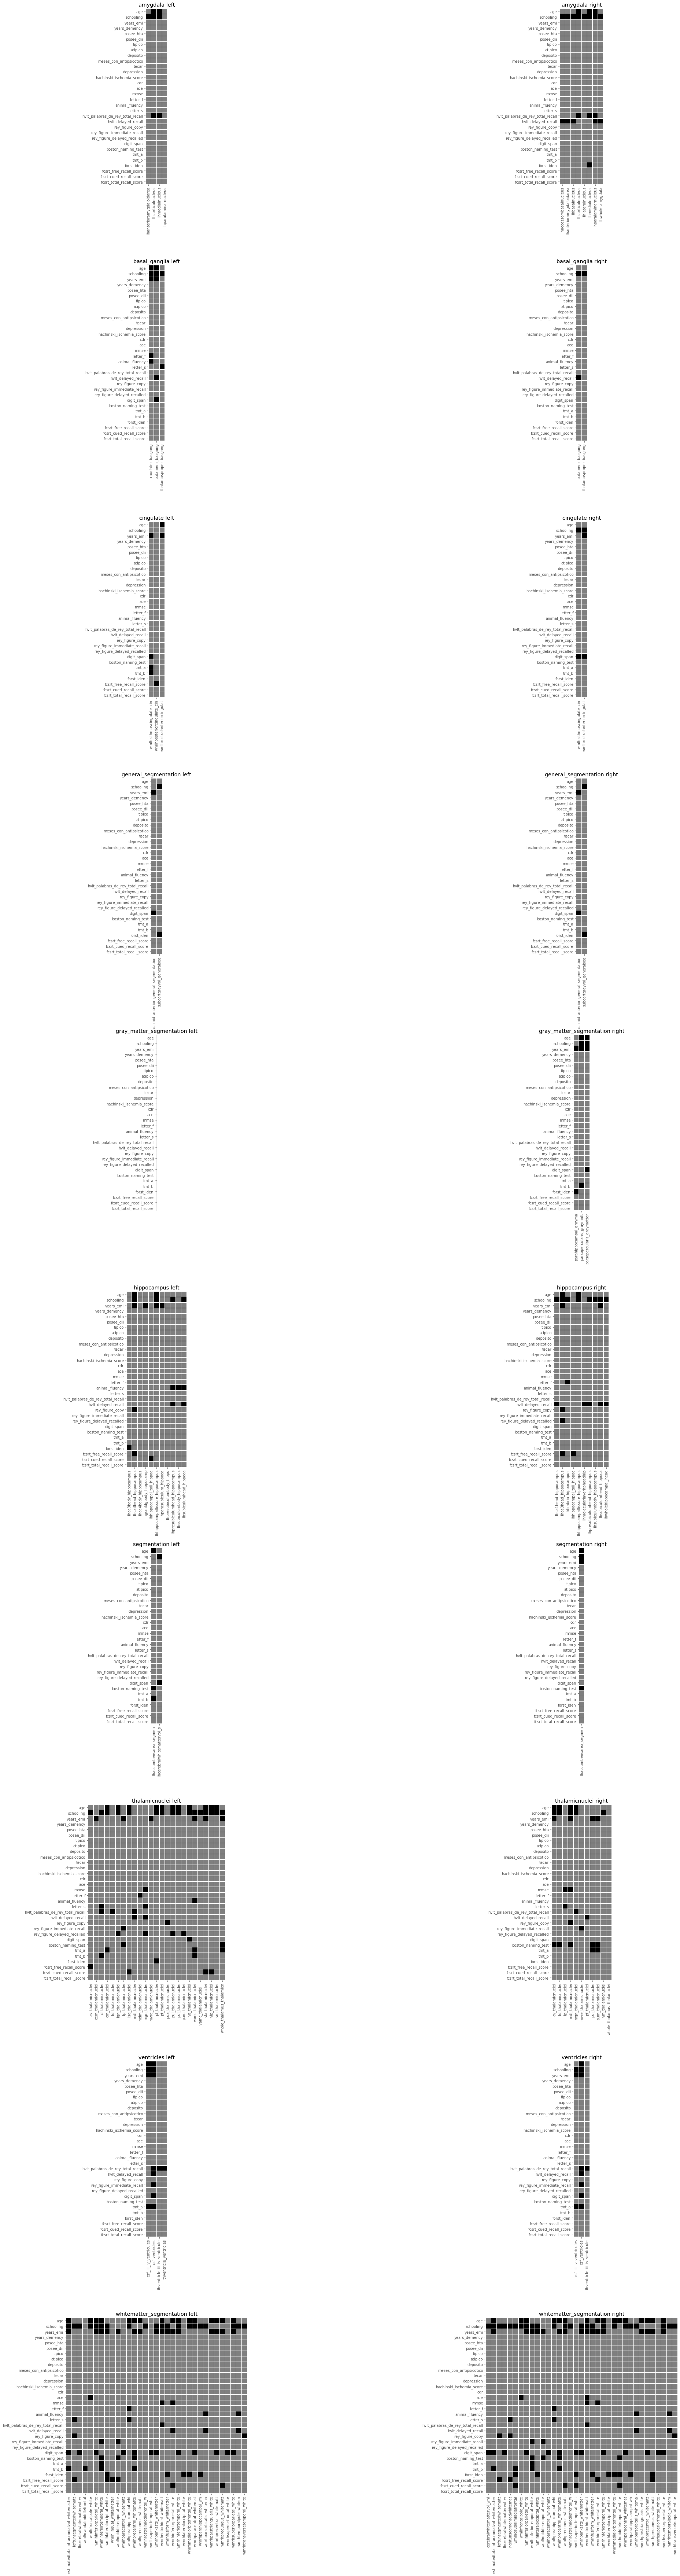

In [136]:
#Substructure + side
#To print all labels, 1. axf.set_xticklabels(x_labels, fontdict=None, minor=False,rotation=90)
# and 2. Set too high height

fig, axes = plt.subplots(10,2, figsize = (35,100))
fig.tight_layout(pad=20.0)

idx_structure = -1
for general_structure in general_structures:
    idx_structure = idx_structure + 1
    idx_side = -1
    for side in ['left','right']:
        idx_side = idx_side + 1
        
        general_structure_data = data_non[(data_non['structure']==general_structure) & (data_non['side']==side)]
        
        x_labels_all = general_structure_data['substructure']
        x_labels = x_labels_all.drop_duplicates()
        x_labels_all = x_labels_all.values
        len_x_labels = len(x_labels)

        matrix = np.zeros((len_demographic_functional_tests,len_x_labels))

        
        age_p = general_structure_data['edad_p'].values
        schooling_p = general_structure_data['escolaridad_p'].values
        years_emi_p = general_structure_data['years_em_p'].values
        function_test = general_structure_data['function_test'].values
        function_test_p = general_structure_data['function_test_p'].values


        for i in range(x_labels_all.shape[0]):
            idx_x = np.where(x_labels == x_labels_all[i])[0][0]
            
            if age_p[i]<0.05:
                matrix[0][idx_x] = 1

            if schooling_p[i]<0.05:
                matrix[1][idx_x] = 1

            if years_emi_p[i]<0.05:
                matrix[2][idx_x] = 1


            if function_test_p[i]<0.05:
                idx_y = np.where(demographic_functional_tests == function_test[i])[0][0]
                matrix[idx_y][idx_x] = 1
            
        

        #Constructs the heatmap
        axf = sb.heatmap(
                matrix,
                vmin = 0, vmax=1, center=0,
                cmap = 'binary',
                square =True,
                cbar = False,
                ax = axes[idx_structure][idx_side],
                linewidth=0.5,
                linecolor = "white",
                
            )
        
        
        axf.set_xticklabels(x_labels, fontdict=None, minor=False,rotation=90)
        axf.set_yticklabels(
            demographic_functional_tests,
            #axf.get_xticklabels(),
            rotation=0,
            horizontalalignment='right',
        );
        title = general_structure + ' ' + side#define_title(combination_vars, side, diagnostic, 'Correlation')
        axf.set_title(title)
        
#bbox_inches="tight" allows to save pdf without cutting names        
fig.savefig('r2_spearman-selected-structures_heatmap_plot.pdf', dpi=fig.dpi, bbox_inches="tight")

Total empty:  24


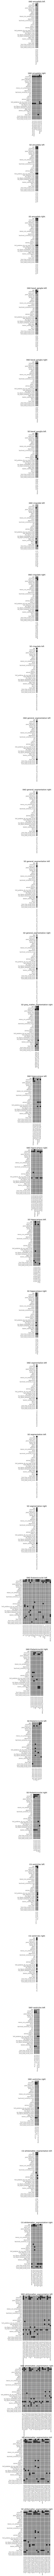

In [135]:
#Substructure + side + group
#60 - 24empty dataframes = 36
#To print all labels, 1. axf.set_xticklabels(x_labels, fontdict=None, minor=False,rotation=90)
# and 2. Set too high height

fig, axes = plt.subplots(36,1, figsize = (70,300))
fig.tight_layout(pad=20.0)

idx_structure = -1
empty_resulted_dataframes = 0
for general_structure in general_structures:
    
    for group in ['CG','SND','SD']:
        
        for side in ['left','right']:
            
            general_structure_data = data_non[(data_non['structure']==general_structure) & \
                                              (data_non['side']==side) & (data_non['group']==group)]
            if general_structure_data.empty:
                empty_resulted_dataframes = empty_resulted_dataframes + 1
                continue
                
            idx_structure = idx_structure + 1    
                
            title = group + ' ' + general_structure + ' ' + side
            
            x_labels_all = general_structure_data['substructure']
            x_labels = x_labels_all.drop_duplicates()
            x_labels_all = x_labels_all.values
            len_x_labels = len(x_labels)

            matrix = np.zeros((len_demographic_functional_tests,len_x_labels))


            age_p = general_structure_data['edad_p'].values
            schooling_p = general_structure_data['escolaridad_p'].values
            years_emi_p = general_structure_data['years_em_p'].values
            function_test = general_structure_data['function_test'].values
            function_test_p = general_structure_data['function_test_p'].values

            for i in range(x_labels_all.shape[0]):
                idx_x = np.where(x_labels == x_labels_all[i])[0][0]

                if age_p[i]<0.05:
                    matrix[0][idx_x] = 1

                if schooling_p[i]<0.05:
                    matrix[1][idx_x] = 1

                if years_emi_p[i]<0.05:
                    matrix[2][idx_x] = 1


                if function_test_p[i]<0.05:
                    idx_y = np.where(demographic_functional_tests == function_test[i])[0][0]
                    matrix[idx_y][idx_x] = 1

            

            #Constructs the heatmap
            axf = sb.heatmap(
                    matrix,
                    vmin = 0, vmax=1, center=0,
                    cmap = 'binary',
                    square =True,
                    cbar = False,
                    ax = axes[idx_structure],
                    linewidth=0.5,
                    linecolor = "white",

                )

            
            axf.set_xticklabels(x_labels, fontdict=None, minor=False,rotation=90)
            axf.set_yticklabels(
                demographic_functional_tests,
                rotation=0,
                horizontalalignment='right',
                minor=False,
            );
            axf.set_title(title)
        
#bbox_inches="tight" allows to save pdf without cutting long labels        
fig.savefig('r2_spearman-selected-structures_heatmap_plot_groups.pdf', dpi=fig.dpi, bbox_inches="tight")
print("Total empty: ",str(empty_resulted_dataframes))